In [ ]:
#This will download a moderately sized csv file to your machine!
from astroquery.gaia import Gaia 
from astroquery.utils.tap.core import TapPlus

tables = Gaia.load_tables()
#for i in tables:
 #   print(i.get_qualified_name())

#print(dir(Gaia))

gaiadr3_cepheids = Gaia.load_table('gaiadr3.vari_cepheid')
for column in gaiadr3_cepheids.columns:
    print(column.name)

gaia = TapPlus(url="https://gea.esac.esa.int/tap-server/tap")

job = gaia.launch_job_async("select top 15000 * from gaiadr3.vari_cepheid order by source_id", dump_to_file=True, output_format='csv')

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
solution_id
source_id
pf
pf_error
p1_o
p1_o_error
epoch_g
epoch_g_error
epoch_bp
epoch_bp_error
epoch_rp
epoch_rp_error
epoch_rv
epoch_rv_error
int_average_g
int_average_g_error
int_average_bp
int_average_bp_error
int_average_rp
int_average_rp_error
average_rv
average_rv_error
peak_to_peak_g
peak_to_peak_g_error
peak_to_peak_bp
peak_to_peak_bp_error
peak_to_peak_rp
peak_to_peak_rp_error
peak_to_peak_rv
peak_to_peak_rv_error
metallicity
metallicity_error
r21_g
r21_g_error
r31_g
r31_g_error
phi21_g
phi21_g_error
phi31_g
phi31_g_error
num_clean_epochs_g
num_clean_epochs_bp
num_clean_epochs_rp
num_clean_epochs_rv
zp_mag_g
zp_mag_bp
zp_mag_rp
num_harmonics_for_p1_g
num_harmonics_for_p1_bp
num_harmonics_for_p1_rp
num_harmonics_for_p1_rv
reference_time_g
reference_time_bp
reference_time_rp
reference_time_rv
fund_freq1
fund_freq1_error
fund_freq2
fu

: 

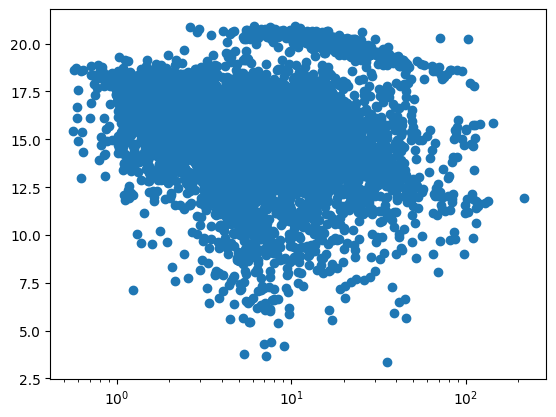

In [ ]:
import pandas as pd
df2 = pd.read_csv('allcepheids.csv') #Change this to whatever the file name ends up being
df2['source_id']
ids = [str(i) for i in df2['source_id']]
idstr = ''
for i in ids[:-1]:
    idstr = idstr+str(i)+','
idstr = idstr+str(ids[-1]) #This just ensures the massive id string doesnt end in a comma. 
#print(idstr)
qry = "SELECT * FROM gaiadr3.gaia_source WHERE gaiadr3.gaia_source.source_id in (" + idstr + ");"
job = gaia.launch_job_async( qry )
tbl= job.get_results()
dfGaia = tbl.to_pandas()

dfGaia.head()
dfGaia.to_csv('cepheidastrometry.csv')

INFO: Query finished. [astroquery.utils.tap.core]
